In [2]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
version = '1.0.0'
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\10/'    
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'
torch_url=f"http://download.pytorch.org/whl/{accelerator}/torch-1.0.0-{platform}-linux_x86_64.whl"  
!pip install -q {torch_url} torchvision


tcmalloc: large alloc 1073750016 bytes == 0x6087e000 @  0x7f23521332a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [3]:
import torch
print('Torch', torch.__version__, 'CUDA', torch.version.cuda)
print('Device:', torch.device('cuda:0'))
print(torch.cuda.is_available())

Torch 1.0.0 CUDA 9.0.176
Device: cuda:0
True


In [0]:
from torch.autograd import Variable
import numpy as np
import time
import matplotlib.pyplot as plt
plt.style.use('default')



In [0]:
Nlist=[5, 1000, 3000]
T=10
timeDiffNP=np.zeros((T,len(Nlist)), dtype=np.float32)
timeDiffTF=np.zeros((T,len(Nlist)), dtype=np.float32)
for N in range(len(Nlist)):
    A=np.random.rand(Nlist[N],Nlist[N])
    Atf=Variable(torch.randn(Nlist[N],Nlist[N]).cuda(), requires_grad=False)
    
    for i in range(T):
        ticNP=time.time()
        B=A@A@A@A@A
        tocNP=time.time()
        
        ticTF=time.time()
        Btf=Atf@Atf@Atf@Atf@Atf
        tocTF=time.time()    
        timeDiffNP[i,N]=tocNP-ticNP
        timeDiffTF[i,N]=tocTF-ticTF        



In [8]:
for N in range(len(Nlist)):
    print('{0}X{0}: {1:f}'.format(Nlist[N], np.mean(timeDiffNP[N,:], axis=0)))
    print('{0}X{0}: {1:f}'.format(Nlist[N], np.mean(timeDiffTF[N,:], axis=0)))

5X5: 2.738888
5X5: 0.001304
1000X1000: 2.710195
1000X1000: 0.000684
3000X3000: 2.716305
3000X3000: 0.000373


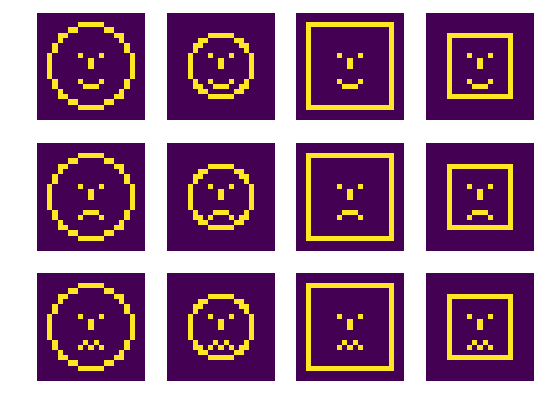

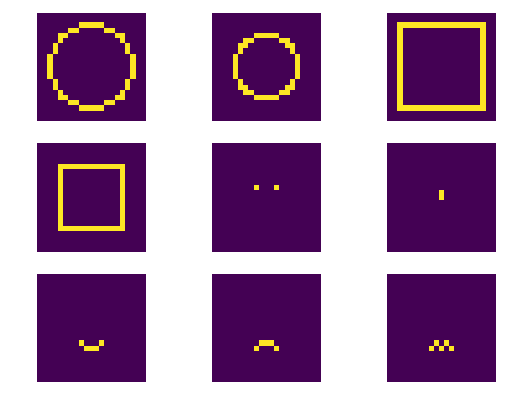

In [9]:
r=8
w1=np.zeros((21,21))
x1=np.array([np.arange(21)]).T
x2=np.array([np.arange(21)])
X1, X2=np.meshgrid(x1,x2)
R=(X1-10)**2+(X2-10)**2
x1c, x2c=np.where(np.all([[R<(r+.5)**2],[R>(r-.5)**2]], axis=0).squeeze())
w1[x1c, x2c]=1
# plt.figure()
# plt.imshow(w1)
# plt.close()
r=6
w2=np.zeros((21,21))
R=(X1-10)**2+(X2-10)**2
x1c, x2c=np.where(np.all([[R<(r+.5)**2],[R>(r-.5)**2]], axis=0).squeeze())
w2[x1c, x2c]=1
# plt.figure()
# plt.imshow(w2)
# plt.close()
r=8
w3=np.zeros((21,21))
w3[2*np.ones((1,17),dtype=np.int8), 2:19]=1
w3[18*np.ones((1,17),dtype=np.int8), 2:19]=1
w3[2:19 ,2*np.ones((1,17),dtype=np.int8)]=1
w3[2:19 ,18*np.ones((1,17),dtype=np.int8)]=1
# plt.imshow(w3)
r=6
w4=np.zeros((21,21))
w4[4*np.ones((1,13),dtype=np.int8), 4:17]=1
w4[16*np.ones((1,13),dtype=np.int8), 4:17]=1
w4[4:17, 4*np.ones((1,13),dtype=np.int8)]=1
w4[4:17, 16*np.ones((1,13),dtype=np.int8)]=1
# plt.imshow(w4)
w5=np.zeros((21,21))
w5[[8,8], [8,12]]=1;
# plt.imshow(w5)
w6=np.zeros((21,21))
w6[9:11, [10,10]]=1;
# plt.imshow(w6)
w7=np.zeros((21,21))
w7[[13,14,14,14,13], [8,9,10,11,12]]=1;
# plt.imshow(w7)
w8=np.zeros((21,21))
w8[[14,13,13,13,14], [8,9,10,11,12]]=1;
# plt.imshow(w7)
w9=np.zeros((21,21))
w9[[14,13,14,13,14], [8,9,10,11,12]]=1;



# plt.imshow(w1+w5+w6+w8)
# w1, w2, w3, w4
# w5, w6
# w7
# w8
X=np.zeros((12,21*21))
X[0,:]=(w1+w5+w6+w7).reshape((1,21*21))
X[1,:]=(w2+w5+w6+w7).reshape((1,21*21))
X[2,:]=(w3+w5+w6+w7).reshape((1,21*21))
X[3,:]=(w4+w5+w6+w7).reshape((1,21*21))
X[4,:]=(w1+w5+w6+w8).reshape((1,21*21))
X[5,:]=(w2+w5+w6+w8).reshape((1,21*21))
X[6,:]=(w3+w5+w6+w8).reshape((1,21*21))
X[7,:]=(w4+w5+w6+w8).reshape((1,21*21))
X[8,:]=(w1+w5+w6+w9).reshape((1,21*21))
X[9,:]=(w2+w5+w6+w9).reshape((1,21*21))
X[10,:]=(w3+w5+w6+w9).reshape((1,21*21))
X[11,:]=(w4+w5+w6+w9).reshape((1,21*21))
X=X.T


W=np.zeros((9,21*21))
W[0,:]=w1.reshape((1,21*21))
W[1,:]=w2.reshape((1,21*21))
W[2,:]=w3.reshape((1,21*21))
W[3,:]=w4.reshape((1,21*21))
W[4,:]=w5.reshape((1,21*21))
W[5,:]=w6.reshape((1,21*21))
W[6,:]=w7.reshape((1,21*21))
W[7,:]=w8.reshape((1,21*21))
W[8,:]=w9.reshape((1,21*21))
W=W.T

# 
plt.figure()
for i in range(3):
  for j in range(4):
    ax=plt.subplot2grid((3, 4), (i, j))
    ax.imshow(X[:,i*4+j].reshape((21,21)))
    plt.axis('off')

plt.figure()
for i in range(3):
  for j in range(3):
    ax=plt.subplot2grid((3, 3), (i, j))
    ax.imshow(W[:,i*3+j].reshape((21,21)))
    plt.axis('off')


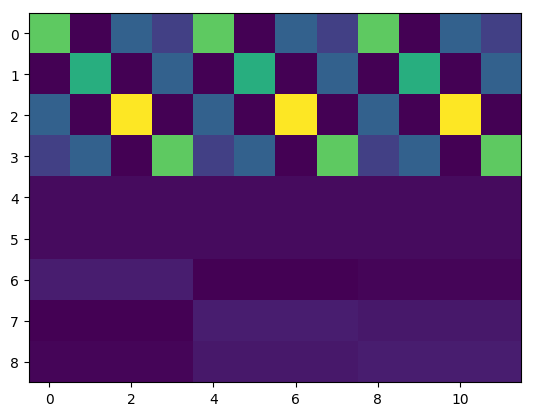

In [10]:
H=W.T@X
plt.figure()
plt.imshow(H)
plt.grid('off')

In [0]:
lr=torch.cuda.FloatTensor([0.0003])
Y=Variable(torch.cuda.FloatTensor([[1,1,1,1,0,0,0,0,0,0,0,0], [0,0,0,0,1,1,1,1,0,0,0,0], [0,0,0,0,0,0,0,0,1,1,1,1]])
           , requires_grad=False)
H=Variable(torch.cuda.FloatTensor(W.T@X), requires_grad=False)
W2=Variable((torch.randn(3,9).type(torch.cuda.FloatTensor)-.5)*.001, requires_grad=True)
maxIter=200
errt=np.zeros(maxIter, dtype=np.float32)

for i in range(maxIter):
  Yh=W2@H
  err=torch.sum(-Y*torch.log(torch.exp(Yh)/torch.sum(torch.exp(Yh), dim=0, keepdim=True)))
  errt[i]=err.data
  err.backward()
  W2.data=W2.data-lr*W2.grad.data

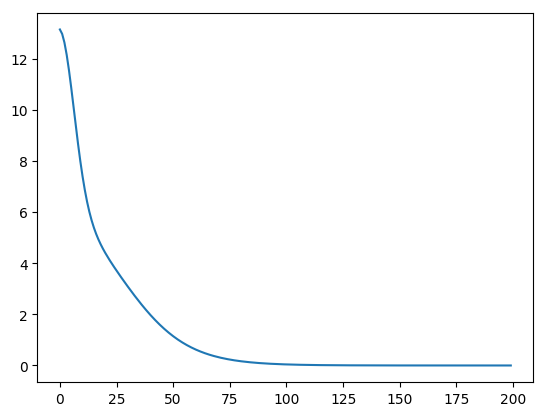

In [12]:
plt.figure()
plt.plot(errt)
plt.show()